In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


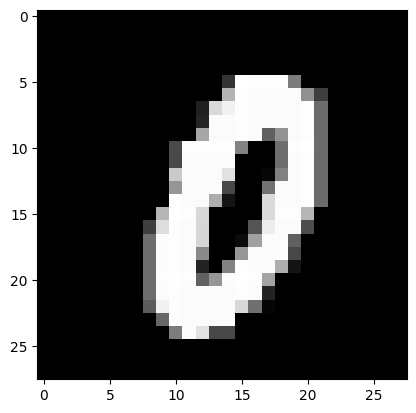

In [3]:
plt.imshow(x_train[34],cmap='gray')
plt.show()

In [4]:
x_train.shape

(60000, 28, 28)

preprocessing

In [5]:
x_train=x_train.reshape((-1,28,28,1)).astype('float32')/255
x_test=x_test.reshape((-1,28,28,1)).astype('float32')/255
x_train.shape

(60000, 28, 28, 1)

model definition

In [11]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'] )
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_3 (Flatten)         (None, 21632)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2769024   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2770634 (10.57 MB)
Trainable params: 2770634 (10.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
hist=model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
235/235 [==============================] - 5s 8ms/step - loss: 0.2324 - accuracy: 0.9336 - val_loss: 0.0878 - val_accuracy: 0.9753
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0658 - accuracy: 0.9804 - val_loss: 0.0627 - val_accuracy: 0.9791
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0397 - accuracy: 0.9888 - val_loss: 0.0562 - val_accuracy: 0.9821
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0257 - accuracy: 0.9925 - val_loss: 0.0543 - val_accuracy: 0.9816
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0169 - accuracy: 0.9951 - val_loss: 0.0575 - val_accuracy: 0.9824
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.0509 - val_accuracy: 0.9841
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0549 - val_accuracy: 0.9838
Epoch 

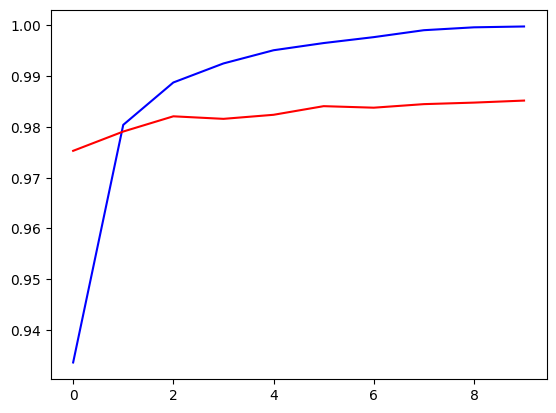

In [13]:
plt.plot(hist.history['accuracy'],color='blue')
plt.plot(hist.history['val_accuracy'],color='red')